In [1]:
import numpy as np
import matplotlib.pyplot as plt

dir = "C:/Users/gusta/OneDrive/Skrivebord/KI & Data/Bachelor/LegeData"




In [2]:
# load the data from the pickle file

import pickle
dir = "C:/Users/gusta/OneDrive/Skrivebord/KI & Data/Bachelor/LegeData"
with open(f"{dir}/data.pkl", "rb") as f:
    data = pickle.load(f)

# print the keys of the data dictionary
print(data.keys())

dict_keys(['S2_EC', 'S2_EO', 'S3_EC', 'S3_EO', 'S4_EC', 'S4_EO', 'S5_EC', 'S5_EO', 'S6_EC', 'S6_EO', 'S7_EC', 'S7_EO', 'S8_EC', 'S8_EO', 'S9_EC', 'S9_EO', 'S10_EC', 'S10_EO', 'S11_EC', 'S11_EO'])


In [3]:
#remove all keys that are not "dataRest"
for key in list(data.keys()):
    for key2 in list(data[key].keys()):
        if key2 != "dataRest":
            del data[key][key2]
print(data["S2_EC"].keys())

dict_keys(['dataRest'])


In [55]:
# we have 68 channels, remove channel 65,66,67
for key in data.keys():
    data[key]["dataRest"] = np.delete(data[key]["dataRest"], [64,65,66], axis=0)



In [75]:
for key in data.keys():
        # replace label values with 0 if it is smaller 210, else set it to 1
        data[key]["dataRest"][-1] = np.where(data[key]["dataRest"][-1] < 210, 0, 1)
        



[1. 1. 1. ... 1. 1. 1.]


In [77]:
# save data as a pickle file
with open(f"{dir}/data.pkl", "wb") as f:
    pickle.dump(data, f)
    print(f"{dir}/data.pkl saved")

    

C:/Users/gusta/OneDrive/Skrivebord/KI & Data/Bachelor/LegeData/data.pkl saved


In [152]:
import pickle
dir = "C:/Users/gusta/OneDrive/Skrivebord/KI & Data/Bachelor/LegeData"
with open(f"{dir}/data.pkl", "rb") as f:
    data = pickle.load(f)


In [153]:
data["S2_EC"]["dataRest"].shape
print(38401/256)

150.00390625


In [154]:
# We have 150 seconds of data, with 256 samples per second, create 150 windows of 256 samples
# each window is 1 second of data

windows = []
for key in data.keys():
    for i in range(0, 38000, 256):
        windows.append(data[key]["dataRest"][:,i:i+256])

windows = np.array(windows)
windows.shape






(2980, 65, 256)

In [164]:
import numpy as np
import pandas as pd

# Assuming `data_matrix` is your 3D data of shape (2980, 65, 256)
data_matrix = windows
# Step 1: Extract the data and labels
# Separate the labels (last column in the 65th channel)
labels = data_matrix[:, -1]  # Assuming labels are constant across all time points per window
#print(labels[145:155])

# Step 2: Reshape the data without the labels
data_without_labels = data_matrix[:, :-1, :]  # Exclude the 65th channel (labels)

# Reshape to (2980 * 256, 64)
data_reshaped = data_without_labels.reshape(-1, data_without_labels.shape[1])

# Step 3: Replicate the labels for each time point in the new rows
# Repeat each label 256 times (once for each time point)


# # Step 4: Combine the reshaped data and the repeated labels into a new DataFrame
df = pd.DataFrame(data_reshaped, columns=[f'channel_{i}' for i in range(1, 65)])
df['label'] = labels.reshape(-1)  # Add the repeated labels as a new column

# # Check the shape of the final DataFrame
print(df.shape)  # Should be (762880, 65)
df.head()

# Looks good
print(df["label"][145*256:155*256])
df["label"].value_counts()







(762880, 65)
37120    1.0
37121    1.0
37122    1.0
37123    1.0
37124    1.0
        ... 
39675    0.0
39676    0.0
39677    0.0
39678    0.0
39679    0.0
Name: label, Length: 2560, dtype: float64


1.0    381440
0.0    381440
Name: label, dtype: int64

In [46]:
print((381440*2)/256)

2980.0


In [165]:
# save the dataframe as a pickle file
with open(f"{dir}/dataframe.pkl", "wb") as f:
    pickle.dump(df, f)
    print(f"{dir}/dataframe.pkl saved")

    

C:/Users/gusta/OneDrive/Skrivebord/KI & Data/Bachelor/LegeData/dataframe.pkl saved


In [18]:
# load the dataframe from the pickle file
import pickle
dir = "C:/Users/gusta/OneDrive/Skrivebord/KI & Data/Bachelor/LegeData"
with open(f"{dir}/dataframe.pkl", "rb") as f:
    df = pickle.load(f)

# keep these channels only, these are the indexes: 
""" 
Fp1 -> 0
Fp2 -> 33
F3  -> 4
F4  -> 38
C3  -> 12
C4  -> 48
P3  -> 20
P4  -> 55
O1  -> 26
O2  -> 61
F7  -> 6
F8  -> 40
T7  -> 14
T8  -> 50
P7  -> 22
P8  -> 57
Fz  -> 36
Cz  -> 46
Pz  -> 30 

but add 1 to each index, since the first channel is channel_1
"""

df = df[["channel_1", "channel_34", "channel_5", "channel_39", "channel_13", "channel_49", "channel_21", "channel_56", "channel_27", "channel_62", "channel_7", "channel_41", "channel_15", "channel_51", "channel_23", "channel_58", "channel_37", "channel_47", "channel_31", "label"]]
df.head()




,channel_1,channel_34,channel_5,channel_39,channel_13,channel_49,channel_21,channel_56,channel_27,channel_62,channel_7,channel_41,channel_15,channel_51,channel_23,channel_58,channel_37,channel_47,channel_31,label
0,1.412883e+07,1.411228e+07,1.412431e+07,1.410553e+07,1.412159e+07,1.409254e+07,1.411452e+07,1.412755e+07,1.411209e+07,1.412067e+07,1.412047e+07,1.411535e+07,1.412726e+07,1.411660e+07,1.410787e+07,1.411747e+07,1.410275e+07,1.411292e+07,1.411667e+07,1.0
1,1.410380e+07,1.410508e+07,1.408847e+07,1.411987e+07,1.410703e+07,1.409951e+07,1.409603e+07,1.411238e+07,1.411161e+07,1.408953e+07,1.410892e+07,1.411862e+07,1.410015e+07,1.409852e+07,1.410742e+07,1.411078e+07,1.411011e+07,1.410118e+07,1.410441e+07,1.0
2,1.410851e+07,1.411683e+07,1.411033e+07,1.410783e+07,1.409171e+07,1.411350e+07,1.410844e+07,1.411030e+07,1.411814e+07,1.411388e+07,1.410323e+07,1.410857e+07,1.410412e+07,1.410732e+07,1.409606e+07,1.410979e+07,1.410934e+07,1.412111e+07,1.411356e+07,1.0
3,1.411343e+07,1.411913e+07,1.411014e+07,1.411574e+07,1.411798e+07,1.413046e+07,1.411583e+07,1.413107e+07,1.411430e+07,1.413065e+07,1.411078e+07,1.409667e+07,1.412185e+07,1.413209e+07,1.411654e+07,1.413196e+07,1.411436e+07,1.412758e+07,1.411065e+07,1.0
4,-4.909065e+06,-4.927497e+06,-4.917001e+06,-4.932649e+06,-4.914921e+06,-4.948041e+06,-4.942121e+06,-4.922473e+06,-4.937705e+06,-4.929001e+06,-4.925417e+06,-4.927273e+06,-4.917385e+06,-4.929769e+06,-4.933385e+06,-4.930729e+06,-4.940809e+06,-4.932073e+06,-4.923593e+06,1.0


In [19]:
print(762880/256)

2980.0


sizes and contents are: freq [120. 122. 124. 126. 128.], times [0.   0.25 0.5  0.75 1.  ]
Zxx shape is (65, 5)


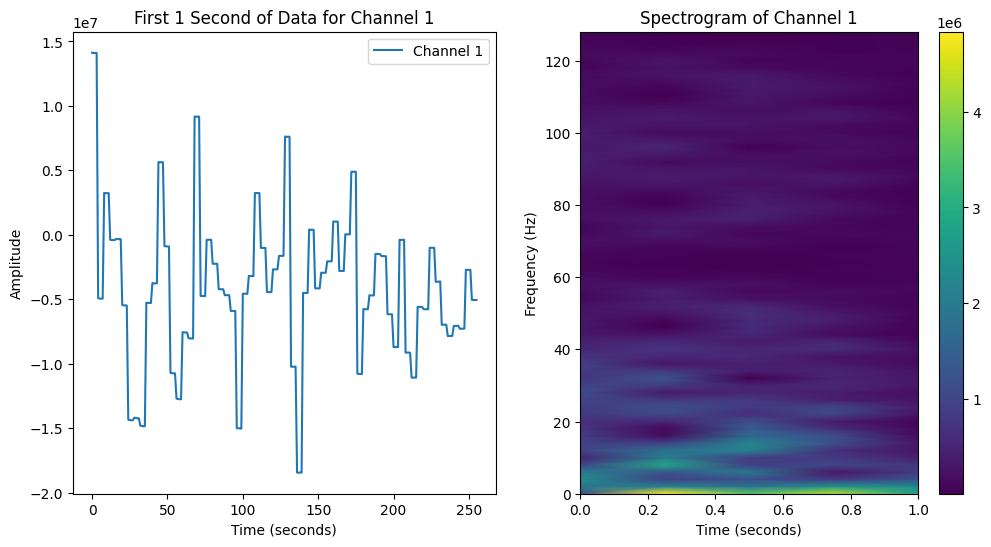

In [48]:
import numpy as np
import pandas as pd
from scipy.signal import stft
import matplotlib.pyplot as plt

# create two plots side by side 
fig, axs = plt.subplots(1, 2, figsize=(12, 6))



# Plot the first 1 seconds of data for the first channel
axs[0].plot(df['channel_1'][:256], label='Channel 1')
axs[0].set_xlabel('Time (seconds)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('First 1 Second of Data for Channel 1')
axs[0].legend()

# Assume `data_series` is your pandas Series of 256 data points
data_series = df['channel_1'][:256]  # Example data

# Step 1: Set parameters for the STFT
fs = 256  # Sampling frequency (in Hz)
nperseg = fs/2  # Length of each segment for STFT (typically a power of 2)

# Step 2: Perform STFT
frequencies, times, Zxx = stft(data_series, fs, nperseg=nperseg)
print(f"sizes and contents are: freq {frequencies[-5:]}, times {times}")  # Should be (129, 1) for this example
print(f"Zxx shape is {Zxx.shape}")  # Should be (129, 1)

# Step 3: Create the spectrogram (magnitude of STFT)
spectrogram = np.abs(Zxx)

# Plot the spectrogram in the right pane in the side by side plots
axs[1].pcolormesh(times, frequencies, spectrogram, shading='gouraud')
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (seconds)')
axs[1].set_title('Spectrogram of Channel 1')
fig.colorbar(axs[1].pcolormesh(times, frequencies, spectrogram, shading='gouraud'))
plt.show()


# Step 4: Prepare spectrogram data for machine learning
# Flatten the spectrogram for use as features in a machine learning model
spectrogram_flattened = spectrogram.flatten()  # Or use other reshaping strategies as needed




In [7]:
# Perform STFT on all channels
from scipy.signal import stft
import numpy as np


fs = 256  # Sampling frequency (in Hz)
nperseg = fs/2  # Length of each segment for STFT (typically a power of 2)

data = df.drop(columns='label')

# create empty list for the spectrograms, each channel will have its own list
spectrograms = [[] for _ in range(data.shape[1])]

# Perform STFT on each channel for first second(256 samples) of data
for channel in range(data.T.shape[0]):  # Loop over 64 channels
    print(f"Processing channel {channel + 1}...")
    for i in range(0,data.T.shape[1],256): # loop over 2980 seconds of data
        frequencies, times, Zxx = stft(data.T.iloc[channel, i:i+256], fs, nperseg=nperseg)
        spectrogram = np.abs(Zxx)  # Shape: (n_freq_bins, n_time_segments)
  
    
        # Flatten the spectrogram of this channel
        spectrogram_flattened = spectrogram.flatten()  # Flatten to 1D array
        
        # Append to list
        spectrograms[channel].append(spectrogram_flattened)

print(len(spectrograms))
print(len(spectrograms[0]))
print(len(spectrograms[0][0]))
print(spectrograms[0][0].shape)




Processing channel 1...
Processing channel 2...
Processing channel 3...
Processing channel 4...
Processing channel 5...
Processing channel 6...
Processing channel 7...
Processing channel 8...
Processing channel 9...
Processing channel 10...
Processing channel 11...
Processing channel 12...
Processing channel 13...
Processing channel 14...
Processing channel 15...
Processing channel 16...
Processing channel 17...
Processing channel 18...
Processing channel 19...
19
2980
325
(325,)


In [4]:
# for each of the 19 channels, combine all the spectrograms into a single feature vector
combined_features = []
for channel in range(len(spectrograms)):
    combined_features.append(np.concatenate(spectrograms[channel]))


"""
 When training:
 one second of data is 325 features, 19 channels is 6175 features.
 There are 149 seconds of data for each patient for each label.
 
"""

combined_stft_features = np.array(combined_features)
print(combined_stft_features.shape)

# save the combined features as a pickle file
with open(f"{dir}/combined_stft_features_19.pkl", "wb") as f:
    pickle.dump(combined_stft_features, f)
    print(f"{dir}/combined_stft_features_19.pkl saved")




NameError: name 'spectrograms' is not defined

In [1]:
print(325*64, 325*19)

20800 6175


In [5]:

# load the combined features from the pickle file
import pickle
import numpy as np
import pandas as pd
dir = "C:/Users/gusta/OneDrive/Skrivebord/KI & Data/Bachelor/LegeData"
with open(f"{dir}/combined_stft_features_19.pkl", "rb") as f:
    combined_stft_features = pickle.load(f)
    

# # Assuming this corresponds to one label, e.g., `label`
labels = []
for _ in range(10):
    labels.append(np.repeat([1,0],149))

    
y = np.array([labels]).flatten()
print(y.shape, y[147:152])  # Should be (1, 2980)



X = combined_stft_features
train_sample = X[:,:325].flatten()
print(train_sample.shape)



# Prepare to create the DataFrame
rows = []

# Loop through the number of segments in X
num_segments = 2980
num_features = 6175  # 19 channels * 325 features per channel
# Step 1: Pre-allocate the array for the final data
# Each row will have num_features features
flattened_data = np.zeros((num_segments, num_features))

# Step 2: Extract and flatten segments
for i in range(num_segments):
    if i % 100 == 0: 
        print(f"progress: {i}/{num_segments}")
    # Extract the current block of 325 data points across 19 channels
    segment_features = combined_stft_features[:, i * 325:(i * 325 + 325)]
    
    # Flatten the block to 1D and place it in the corresponding row
    flattened_data[i, :] = segment_features.flatten()

# Step 3: Create the DataFrame using the flattened data
# Create the DataFrame directly from the pre-allocated NumPy array
data = pd.DataFrame(flattened_data, columns=[f'feature_{j+1}' for j in range(num_features)])

# Step 4: Add labels to the DataFrame
data['label'] = y

# Check the shape of the final DataFrame
print(data.shape)  # Should be (2980, 6175 + 1)

# Display the first few rows
data.head()

(2980,) [1 1 0 0 0]
(6175,)
progress: 0/2980
progress: 100/2980
progress: 200/2980
progress: 300/2980
progress: 400/2980
progress: 500/2980
progress: 600/2980
progress: 700/2980
progress: 800/2980
progress: 900/2980
progress: 1000/2980
progress: 1100/2980
progress: 1200/2980
progress: 1300/2980
progress: 1400/2980
progress: 1500/2980
progress: 1600/2980
progress: 1700/2980
progress: 1800/2980
progress: 1900/2980
progress: 2000/2980
progress: 2100/2980
progress: 2200/2980
progress: 2300/2980
progress: 2400/2980
progress: 2500/2980
progress: 2600/2980
progress: 2700/2980
progress: 2800/2980
progress: 2900/2980
(2980, 6176)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_6167,feature_6168,feature_6169,feature_6170,feature_6171,feature_6172,feature_6173,feature_6174,feature_6175,label
0,1.234975e+06,4.839037e+06,3.558511e+06,4.274398e+06,2.774878e+06,1.872361e+06,2.144127e+06,1.833672e+06,2.518140e+06,2.257239e+06,...,31274.619493,4892.784415,33274.706741,44751.277481,43803.453403,18334.644057,9972.976111,18155.477464,47590.836455,1
1,1.181499e+06,4.811126e+06,3.498501e+06,4.239587e+06,2.777441e+06,1.855363e+06,2.126928e+06,1.793427e+06,2.512297e+06,2.260179e+06,...,29503.628768,7787.198801,36588.498804,44721.844908,53375.229116,14588.732144,42.137432,25333.834152,47048.436933,1
2,1.161088e+06,4.803255e+06,3.474499e+06,4.223919e+06,2.778870e+06,1.849001e+06,2.123587e+06,1.778005e+06,2.508688e+06,2.261982e+06,...,30671.147358,3275.411456,32422.760342,44225.625829,44837.432876,17802.540826,10636.816380,18014.355873,46826.454482,1
3,1.169557e+06,4.811221e+06,3.482818e+06,4.235808e+06,2.776457e+06,1.851174e+06,2.129812e+06,1.782339e+06,2.513941e+06,2.259428e+06,...,30545.643885,2752.800142,34410.927620,44126.882882,47223.561512,17149.534083,7850.932958,21707.234799,46349.833741,1
4,1.165090e+06,4.808590e+06,3.478687e+06,4.232025e+06,2.776579e+06,1.848120e+06,2.128728e+06,1.780386e+06,2.513232e+06,2.259761e+06,...,28095.128566,2220.298181,34248.128730,44034.430580,46266.659070,15467.879867,9397.293786,21800.001447,45770.991612,1


In [8]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accs = []
seeds = np.arange(30)


for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], y, test_size=0.2, random_state=seed)
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    model = LogisticRegression(max_iter=1000,verbose=1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accs.append(accuracy)
    print(f'Model accuracy: {accuracy*100:.2f}%')
    print(f"seed: {seed}")
    # with open(f"{dir + "/models"}/model{seed}_19channels.pkl", "wb") as f:
    #     pickle.dump(model, f)
    #     print(f"{dir + "/models"}/model{seed}_19channels.pkl saved")









Model accuracy: 100.00%
seed: 0
Model accuracy: 99.83%
seed: 1
Model accuracy: 99.83%
seed: 2
Model accuracy: 99.66%
seed: 3
Model accuracy: 99.66%
seed: 4
Model accuracy: 99.50%
seed: 5
Model accuracy: 99.33%
seed: 6
Model accuracy: 99.66%
seed: 7
Model accuracy: 99.83%
seed: 8
Model accuracy: 100.00%
seed: 9
Model accuracy: 99.50%
seed: 10
Model accuracy: 99.83%
seed: 11
Model accuracy: 100.00%
seed: 12
Model accuracy: 99.83%
seed: 13
Model accuracy: 99.83%
seed: 14
Model accuracy: 99.83%
seed: 15
Model accuracy: 99.83%
seed: 16
Model accuracy: 99.83%
seed: 17
Model accuracy: 99.83%
seed: 18
Model accuracy: 99.83%
seed: 19
Model accuracy: 99.50%
seed: 20
Model accuracy: 99.66%
seed: 21
Model accuracy: 100.00%
seed: 22
Model accuracy: 99.66%
seed: 23
Model accuracy: 99.83%
seed: 24
Model accuracy: 99.66%
seed: 25
Model accuracy: 100.00%
seed: 26
Model accuracy: 99.66%
seed: 27
Model accuracy: 99.66%
seed: 28
Model accuracy: 100.00%
seed: 29


Mean accuracy: 99.77%, Standard deviation: 0.17%
95% confidence interval: (99.71%, 99.83%)


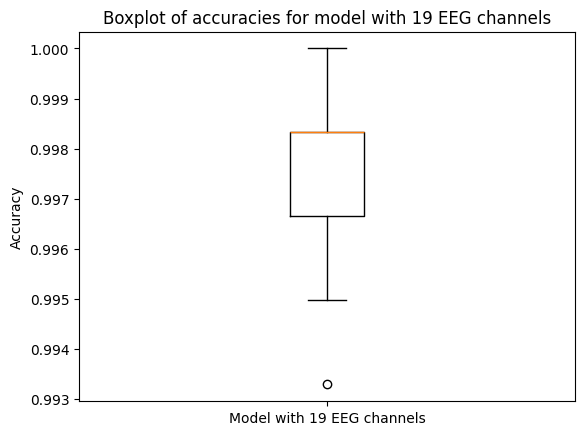

C:/Users/gusta/OneDrive/Skrivebord/KI & Data/Bachelor/LegeData/accs_19channels.pkl saved


In [17]:
mean, std = np.mean(accs), np.std(accs)
print(f"Mean accuracy: {mean*100:.2f}%, Standard deviation: {std*100:.2f}%")

l_bound, u_bound = mean - 1.96 *(std/np.sqrt(len(seeds))), mean + 1.96 *(std/np.sqrt(len(seeds)))
print(f"95% confidence interval: ({l_bound*100:.2f}%, {u_bound*100:.2f}%)")

# make boxplot of accuracies
import matplotlib.pyplot as plt
plt.boxplot(accs)
plt.xticks([1], ["Model with 19 EEG channels"])
plt.ylabel("Accuracy")
plt.title("Boxplot of accuracies for model with 19 EEG channels")
plt.show()


# save accs as a pickle file
with open(f"{dir}/accs_19channels.pkl", "wb") as f:
    pickle.dump(accs, f)
    print(f"{dir}/accs_19channels.pkl saved")
    